In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
# Cargar dataset de House Prices
file_id = '1hVTSePnmxqHzjFjIO5DT1VNa1ObShvgN'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)

In [ ]:
# EDA
# Muestra las primeras 5 filas
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# EDA
# Información de columnas, tipos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# EDA
# Estadísticas básicas para columnas numéricas
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# EDA
# Lista los nombres de columnas
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Cantidad de valores faltantes por columna
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
#Eliminar los filas que contengan nulos
df.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
# Definir la lista con las columnas que vamos a utilizar para nuestro análisis
df = df[['MSZoning', 'LotArea', 'SalePrice', 'YrSold', 'MoSold','Neighborhood', 'Condition1', 'YearBuilt','OverallQual','OverallCond','GrLivArea']]

In [ ]:
print (df)

     MSZoning  LotArea  SalePrice  YrSold  MoSold Neighborhood Condition1  \
0          RL     8450     208500    2008       2      CollgCr       Norm   
1          RL     9600     181500    2007       5      Veenker      Feedr   
2          RL    11250     223500    2008       9      CollgCr       Norm   
3          RL     9550     140000    2006       2      Crawfor       Norm   
4          RL    14260     250000    2008      12      NoRidge       Norm   
...       ...      ...        ...     ...     ...          ...        ...   
1455       RL     7917     175000    2007       8      Gilbert       Norm   
1456       RL    13175     210000    2010       2       NWAmes       Norm   
1457       RL     9042     266500    2010       5      Crawfor       Norm   
1458       RL     9717     142125    2010       4        NAmes       Norm   
1459       RL     9937     147500    2008       6      Edwards       Norm   

      YearBuilt  OverallQual  OverallCond  GrLivArea  
0          2003     

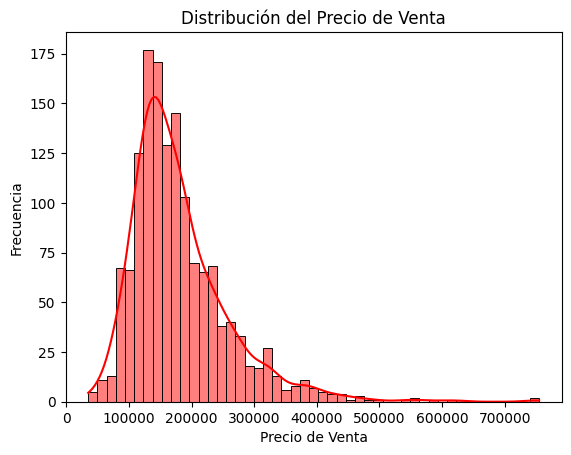

In [ ]:
# Frecuencia de Venta de casa por los valores de costo.
sns.histplot(df['SalePrice'], kde=True, color="red")
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

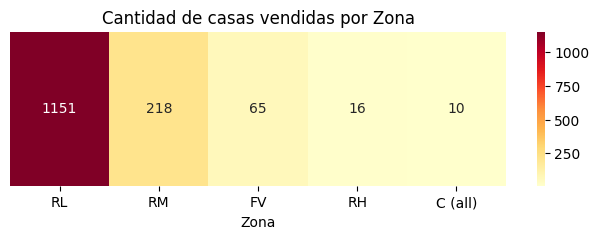

In [ ]:
# Cantidades de casas vendidas por zona
ventas_por_zona = df['MSZoning'].value_counts().to_frame().T  # Transponemos para que sea 1 fila

plt.figure(figsize=(8, 2))
sns.heatmap(ventas_por_zona, annot=True, fmt='d', cmap='YlOrRd')

plt.title('Cantidad de casas vendidas por Zona')
plt.xlabel('Zona')
plt.yticks([])  # Quitamos el eje Y porque solo hay una fila
plt.show()

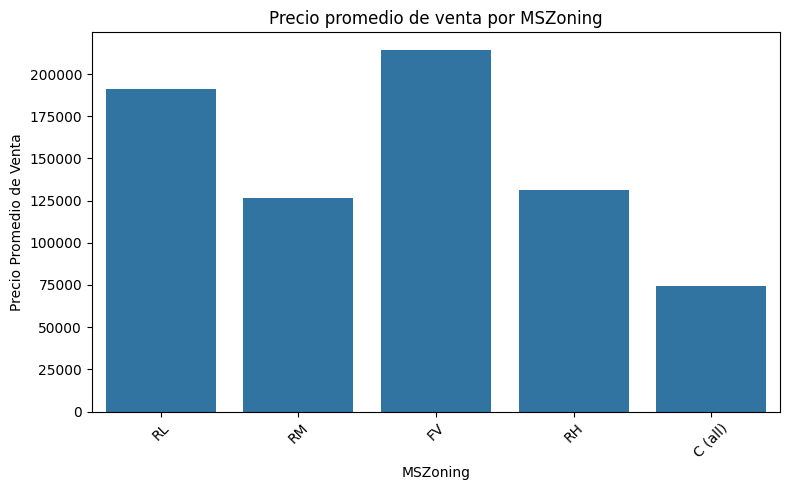

In [ ]:
# Paso 4: Barplot – Precio promedio de venta por MSZoning
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='MSZoning', y='SalePrice', estimator=np.mean, errorbar=None,
            order=df['MSZoning'].value_counts().index)
plt.title('Precio promedio de venta por MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Precio Promedio de Venta')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

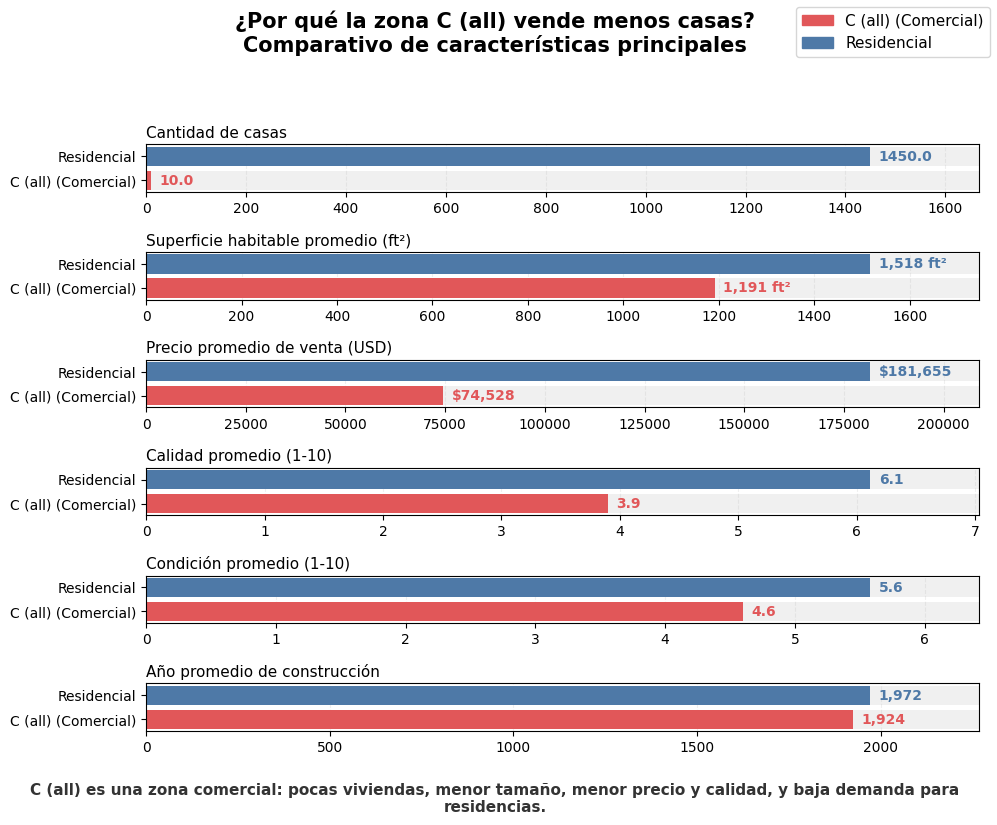

In [ ]:
# CUADRO COMPARATIVO DE CARACTERISTICAS DE ZONA COMERCIAL VS RESIDENCIALES, PARA CONOCER PORQUE C ALL VENDIO MENOS.
zona_c = df[df['MSZoning'] == 'C (all)']
otras_zonas = df[df['MSZoning'] != 'C (all)']

caracts = [
    ('Cantidad de casas', len(zona_c), len(otras_zonas)),
    ('Superficie habitable promedio (ft²)', zona_c['GrLivArea'].mean(), otras_zonas['GrLivArea'].mean()),
    ('Precio promedio de venta (USD)', zona_c['SalePrice'].mean(), otras_zonas['SalePrice'].mean()),
    ('Calidad promedio (1-10)', zona_c['OverallQual'].mean(), otras_zonas['OverallQual'].mean()),
    ('Condición promedio (1-10)', zona_c['OverallCond'].mean(), otras_zonas['OverallCond'].mean()),
    ('Año promedio de construcción', zona_c['YearBuilt'].mean(), otras_zonas['YearBuilt'].mean()),
]

labels = ['C (all) (Comercial)', 'Residencial']
colores = ['#E15759', '#4E79A7']

# Gráfico compacto
fig, axes = plt.subplots(len(caracts), 1, figsize=(10, 8))  # Compacto

fig.suptitle('¿Por qué la zona C (all) vende menos casas?\nComparativo de características principales',
             fontsize=15, y=1.01, fontweight='bold')

for idx, (nombre, v_c, v_r) in enumerate(caracts):
    valores = [v_c, v_r]
    max_val = max(valores) * 1.15
    axes[idx].barh(labels, [max_val, max_val], color='#f0f0f0', zorder=0)
    axes[idx].barh(labels, valores, color=colores, zorder=2)
    for i, v in enumerate(valores):
        # Etiquetas personalizadas según la métrica
        if "Precio" in nombre:
            text = f"${v:,.0f}"
        elif "Superficie" in nombre:
            text = f"{v:,.0f} ft²"
        elif "Año" in nombre:
            text = f"{v:,.0f}"
        else:
            text = f"{v:.1f}"
        axes[idx].text(v + max_val*0.01, i, text, va='center', fontweight='bold', fontsize=10, color=colores[i])
    axes[idx].set_title(nombre, loc='left', fontsize=11, pad=5)
    axes[idx].set_xlim(0, max_val)
    axes[idx].grid(axis='x', linestyle='--', alpha=0.2, zorder=1)
    axes[idx].tick_params(axis='y', labelsize=10)
    axes[idx].set_axisbelow(True)

# Leyenda general
from matplotlib.patches import Patch
legend_patches = [Patch(color=colores[0], label='C (all) (Comercial)'), Patch(color=colores[1], label='Residencial')]
fig.legend(handles=legend_patches, loc='upper right', fontsize=11, frameon=True, framealpha=0.8)

plt.tight_layout(h_pad=1.2, rect=[0, 0.06, 1, 0.96])
plt.figtext(0.5, 0.01,
    "C (all) es una zona comercial: pocas viviendas, menor tamaño, menor precio y calidad, y baja demanda para residencias.",
    wrap=True, horizontalalignment='center', fontsize=11, color='#333333', fontweight='bold'
)
plt.show()

In [ ]:
# Crear zona_data agregando precio promedio y cantidad de casas por vecindario
zona_data = df.groupby('Neighborhood').agg({
    'SalePrice': 'mean',
    'Neighborhood': 'count'
}).rename(columns={
    'SalePrice': 'Precio_Promedio',
    'Neighborhood': 'Cantidad_Casas'
}).reset_index()

# Añadir la columna MSZoning (relacionada por Neighborhood)
zona_data = zona_data.merge(
    df[['Neighborhood', 'MSZoning']].drop_duplicates(),
    on='Neighborhood'
)

# Crear la gráfica
fig = px.scatter(
    zona_data,
    x='Neighborhood',
    y='Precio_Promedio',
    size='Cantidad_Casas',
    color='Precio_Promedio',
    symbol='MSZoning',  # Símbolos geométricos según MSZoning
    title='Relación entre Zonas, Precios y Cantidad de Casas (símbolos por MSZoning)'
)

# Configurar la leyenda horizontal y abajo
fig.update_layout(
    xaxis_title='Zona',
    yaxis_title='Precio Promedio',
    legend=dict(
        orientation="h",         # Leyenda horizontal
        yanchor="top",
        y=-0.2,                  # Ubicación debajo de la gráfica
        xanchor="center",
        x=0.5,
        title="Leyenda (Zonas)"
    )
)

# Mostrar gráfico
fig.show()

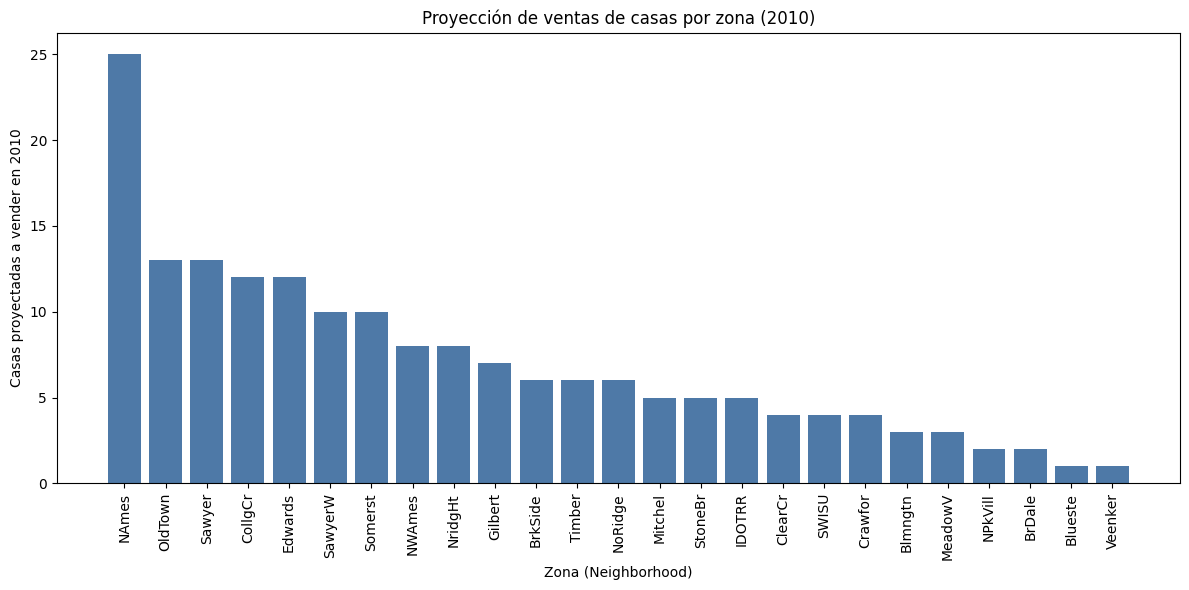

Top 5 zonas con más ventas proyectadas en 2010:
                 Zona  Ventas_2010_pred
Neighborhood                           
NAmes           NAmes                25
OldTown       OldTown                13
Sawyer         Sawyer                13
CollgCr       CollgCr                12
Edwards       Edwards                12


In [ ]:
# Prediccion de ventas de casas por vencindario en el 2010
# Consideraremos solo las ventas hasta 2009 para predecir 2010
df_train = df[df['YrSold'] < 2010]
df_test = df[df['YrSold'] == 2010]

# La variable objetivo: número de casas vendidas por zona en 2010
ventas_2010 = df_test['Neighborhood'].value_counts().sort_values(ascending=False)

# Para proyectar, predeciremos el número de ventas por zona usando las características históricas
# Construir dataset de entrenamiento: agregamos por zona
agg_cols = ['LotArea', 'GrLivArea', 'OverallQual', 'OverallCond', 'SalePrice', 'YearBuilt']
train_agg = df_train.groupby('Neighborhood')[agg_cols].mean()
train_agg['Ventas_previas'] = df_train.groupby('Neighborhood').size()
train_agg['Zona'] = train_agg.index

# La variable a predecir es el número de casas vendidas en 2010 por zona
train_agg['Ventas_2010'] = train_agg['Zona'].map(ventas_2010).fillna(0).astype(int)

# Codificar variables categóricas si hubiera
le = LabelEncoder()
train_agg['Zona_enc'] = le.fit_transform(train_agg['Zona'])

# Variables predictoras
features = agg_cols + ['Ventas_previas', 'Zona_enc']

X = train_agg[features]
y = train_agg['Ventas_2010']

# Entrenar modelo (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Proyectar ventas para 2010 usando las características actuales de cada zona
# (Simulamos con los mismos datos porque no hay zonas nuevas en 2010)
train_agg['Ventas_2010_pred'] = model.predict(X).round().astype(int)

# Mostrar proyección ordenada
proy = train_agg[['Zona', 'Ventas_2010_pred']].sort_values('Ventas_2010_pred', ascending=False)

# Graficar
plt.figure(figsize=(12,6))
plt.bar(proy['Zona'], proy['Ventas_2010_pred'], color="#4E79A7")
plt.xlabel('Zona (Neighborhood)')
plt.ylabel('Casas proyectadas a vender en 2010')
plt.title('Proyección de ventas de casas por zona (2010)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Mostrar las zonas top 5 que más venderán
print("Top 5 zonas con más ventas proyectadas en 2010:")
print(proy.head())